# Capítulo 6
## Taller en Clase

# Practica para leer archivos de Precipitación y Temperatura

En la clase, vamos a trabajar con datos de libre acceso encontrados en *sciencedatabase.gov* con el fin de aprender a leer archivos planos con informaci´øn geocientífica. 

Referencia de los datos:
Kam, Jonghun, Milly, P.C.D., and Dunne, K.A., 2018, Monthly Time Series of Precipitation, Air Temperature, and Net Radiation for 2,673 Gaged River Basins Worldwide: U.S. Geological Survey data release, https://doi.org/10.5066/F7SJ1JVG.

En el folder, hay 2 archivos con datos: `MON_P_CRU_19012015.csv` y `MON_T_CRU_19012015.csv`, que representan para cada una de las estaciones la Precipitaci´øn y la Temperatura respectivamente. Note que cada *estación* esta organizada por filas, cada columna representa un mes del año.  

Adicionalmente hay un archivo con la ubicación de cada estación `BASIN_CHARACTERISTICS.csv`, donde se encuentra la latitud y longitud de cada estación. 

Fuente: https://www.sciencebase.gov/catalog/item/5a58af4fe4b00b291cd6a5fb

## Tarea en Clase

- Leer el archivo de lat/lon de cada estación.
- Leer los datos de precipitación y temperatura. 
- Con los códigos de figuras, hacer el mapa de estaciones.
- Con los códigos de figuras, graficar la precipitación y temperatura de una estación

In [12]:
#
# Leer datos de T/P, graficar
#

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Nombres de archivos
Tfile    = 'MON_T_CRU_19012015.csv'
Pfile    = 'MON_P_CRU_19012015.csv'
sta_file = 'BASIN_CHARACTERISTICS.csv'

# Read data files
t1file = np.loadtxt(Tfile,skiprows=1,delimiter=',')
p1file = np.loadtxt(Pfile,skiprows=1,delimiter=',')
s1tafile = np.loadtxt(sta_file,skiprows=1,delimiter=',')


# Organize files
T = t1file[:,1:]
P = p1file[:,1:]

sta  = s1tafile[:,0]
lon  = s1tafile[:,1]
lat  = s1tafile[:,2]
area = s1tafile[:,3]
elev = s1tafile[:,4]


In [13]:
print(T)

[[26.    28.7   29.8   ... 27.1   27.1   24.   ]
 [25.8   28.6   29.6   ... 26.5   26.7   23.7  ]
 [23.9   27.4   28.5   ... 25.3   25.6   22.8  ]
 ...
 [-9.08  -6.81  -1.82  ...  5.05   1.75  -0.363]
 [-6.56  -5.98   0.896 ...  6.91   4.57   2.2  ]
 [-7.85  -7.4   -1.54  ...  5.31   2.58   0.197]]


C:\Users\Julia\anaconda3\envs\geopython\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


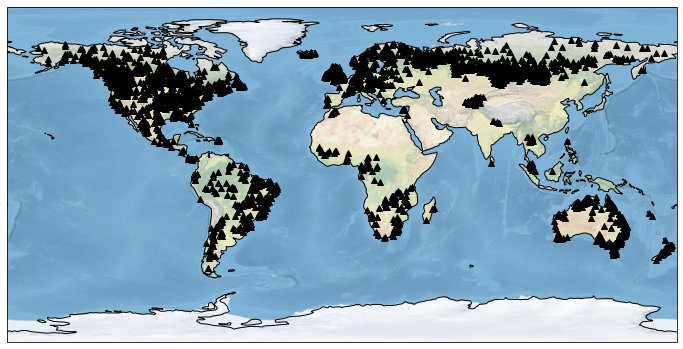

In [7]:
# Mapa de los resultados
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
ax  = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
ax.plot(lon,lat,'k^')

(1000.0, 1400.0)

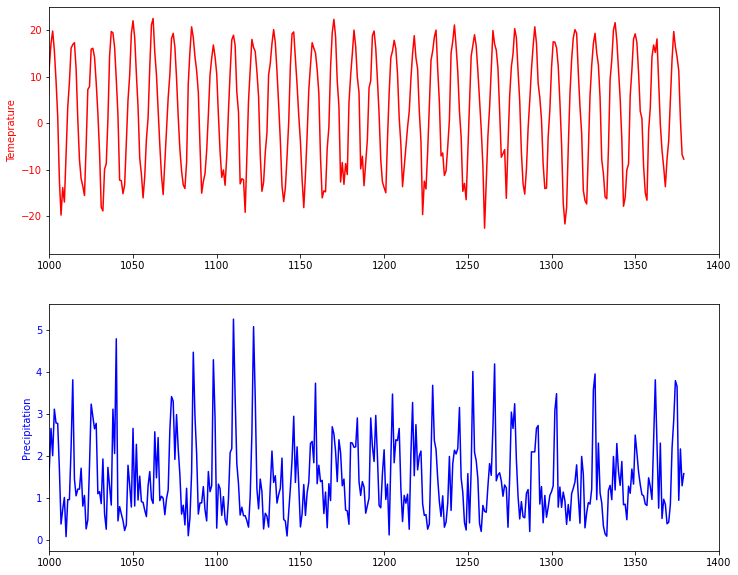

In [14]:
# select station
ista = np.random.randint(len(sta))

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(211)
ax.plot(T[ista,:],color='r')
ax.set_ylabel('Temeprature',color='r')
ax.tick_params(axis='y',labelcolor='r')
ax2 = fig.add_subplot(212)
ax2.plot(P[ista,:],color='b')
ax2.set_ylabel('Precipitation',color='b')
ax2.tick_params(axis='y',labelcolor='b')

ax.set_xlim(1000,1400)
ax2.set_xlim(1000,1400)